In [1]:
import pandas as pd
import numpy as np
import os

In [5]:
import pandas as pd
import os

# Use a relative path from your current folder
path = 'targets_download/capacity_target_wide-Table 1.csv'

target_2030 = pd.read_csv(path)
target_2030

,country_code,country_name,ember_region,target_year,unit,res_capacity_target,res_share_target,Hydro,Rest of renewables,Solar,Wind,Offshore Wind,Onshore Wind,Bioenergy,Other Renewables,"Hydro, bio and other renewables",Renewables
0,ALB,Albania,Europe,2030,Capacity (GW),3.30000,100.00,2.51000,NaN,0.49000,0.30000,NaN,NaN,NaN,NaN,NaN,NaN
1,ARE,United Arab Emirates,Middle East,2030,Capacity (GW),9.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2
2,ARG,Argentina,Latin America and Caribbean,2030,Capacity (GW),32.47200,47.39,13.21500,19.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUS,Australia,Oceania,2030,Capacity (GW),110.40000,85.10,6.80000,NaN,62.70000,39.90000,1.000,NaN,NaN,NaN,NaN,NaN
4,AUT,Austria,Europe,2030,Capacity (GW),35.70000,93.90,14.97000,NaN,12.50000,7.30000,NaN,NaN,0.93000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,USA,United States,North America,2030,Capacity (GW),740.90000,30.00,103.40000,NaN,428.30000,NaN,6.200,187.800,10.20000,5.0,NaN,NaN
82,UZB,Uzbekistan,Asia,2030,Capacity (GW),11.80000,26.60,3.80000,NaN,5.00000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN
83,VNM,Viet Nam,Asia,2030,Capacity (GW),168.02500,47.00,34.66700,NaN,73.41600,NaN,17.032,38.029,4.88100,NaN,NaN,NaN
84,XKX,Kosovo,Europe,2030,Capacity (GW),1.45179,43.00,0.10188,NaN,0.63675,0.68769,NaN,NaN,0.02547,NaN,NaN,NaN


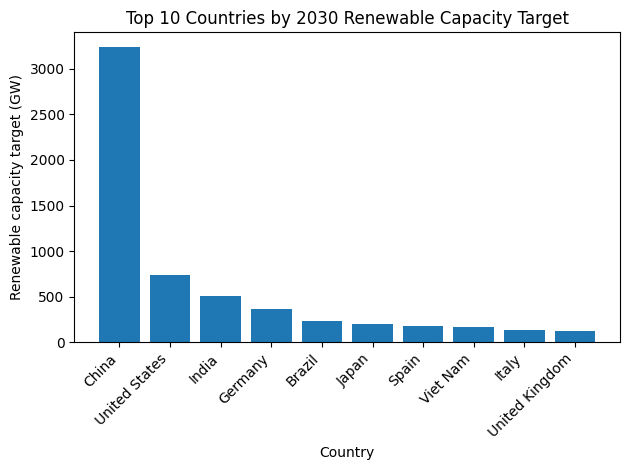

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy dataframe
df = target_2030.copy()

# Clean + get top 10
plot_df = (
    df[df["country_name"].notna()]
    .sort_values("res_capacity_target", ascending=False)
    .head(10)
)

# Plot
plt.figure()
plt.bar(plot_df["country_name"], plot_df["res_capacity_target"])

plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Renewable capacity target (GW)")
plt.title("Top 10 Countries by 2030 Renewable Capacity Target")

plt.tight_layout()
plt.show()


In [4]:
import matplotlib.pyplot as plt

region_capacity = (
    df[["ember_region", "res_capacity_target"]]
    .dropna()
    .groupby("ember_region", as_index=False)
    .sum()
    .sort_values("res_capacity_target", ascending=False)
)

plt.figure()
plt.bar(region_capacity["ember_region"],
        region_capacity["res_capacity_target"])

plt.xticks(rotation=45, ha="right")
plt.xlabel("Region")
plt.ylabel("Total renewable capacity target (GW)")
plt.title("Total 2030 Renewable Capacity Targets by Region")

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [23]:
import pandas as pd
import os

# Load both files
path_capacity = os.path.expanduser(
    '~/Desktop/Energy Dashboard DS3/targets_download/capacity_target_wide-Table 1.csv'
)
path_share = os.path.expanduser(
    '~/Desktop/Energy Dashboard DS3/targets_download/share_target_wide-Table 1.csv'
)

capacity_df = pd.read_csv(path_capacity)
share_df = pd.read_csv(path_share)

# Get country sets
capacity_countries = set(capacity_df['country_code'])
share_countries = set(share_df['country_code'])

# Find differences
only_in_capacity = capacity_countries - share_countries
only_in_share = share_countries - capacity_countries

print(f"Total countries in capacity_target: {len(capacity_countries)}")
print(f"Total countries in share_target: {len(share_countries)}")
print(f"\n{'='*50}")
print(f"\nCountries ONLY in capacity_target ({len(only_in_capacity)}):")
print(sorted(only_in_capacity))
print(f"\nCountries ONLY in share_target ({len(only_in_share)}):")
print(sorted(only_in_share))

# Optional: Show country names instead of codes
if only_in_capacity:
    print(f"\n{'='*50}")
    print("\nDetails - Only in capacity_target:")
    print(capacity_df[capacity_df['country_code'].isin(only_in_capacity)][['country_code', 'country_name']])

if only_in_share:
    print("\nDetails - Only in share_target:")
    print(share_df[share_df['country_code'].isin(only_in_share)][['country_code', 'country_name']])

Total countries in capacity_target: 86
Total countries in share_target: 66


Countries ONLY in capacity_target (22):
['ARE', 'BIH', 'BWA', 'CHN', 'COL', 'CRI', 'CZE', 'ETH', 'GBR', 'GHA', 'JOR', 'KHM', 'LAO', 'LUX', 'MAR', 'MLT', 'MMR', 'RUS', 'SGP', 'SVK', 'SWE', 'THA']

Countries ONLY in share_target (2):
['KAZ', 'TGO']


Details - Only in capacity_target:
   country_code          country_name
1           ARE  United Arab Emirates
8           BIH    Bosnia Herzegovina
10          BWA              Botswana
14          CHN                 China
15          COL              Colombia
16          CRI            Costa Rica
18          CZE               Czechia
26          ETH              Ethiopia
30          GBR        United Kingdom
32          GHA                 Ghana
42          JOR                Jordan
45          KHM              Cambodia
47          LAO                   Lao
50          LUX            Luxembourg
52          MAR               Morocco
56          MLT                

In [24]:
# Identify common columns (for merging) vs unique columns
common_cols = ['country_code', 'country_name', 'ember_region', 'target_year']

# Check columns in each dataframe
print("Capacity columns:", capacity_df.columns.tolist())
print("\nShare columns:", share_df.columns.tolist())

# Rename to distinguish the metrics before merging
capacity_renamed = capacity_df.rename(columns={
    'unit': 'unit_capacity',
    'res_capacity_target': 'capacity_target_gw',
    'res_share_target': 'capacity_share_pct'  # some may have both
})

share_renamed = share_df.rename(columns={
    'unit': 'unit_share',
    'res_capacity_target': 'share_capacity_gw',  # some may have both
    'res_share_target': 'share_target_pct'
})

# Merge with outer join to keep all countries
merged_df = pd.merge(
    capacity_renamed,
    share_renamed,
    on=common_cols,
    how='outer',
    suffixes=('_cap', '_share')
)

print(f"\nMerged dataset shape: {merged_df.shape}")
print(f"Total unique countries: {merged_df['country_code'].nunique()}")

# Preview
merged_df.head(10)

Capacity columns: ['country_code', 'country_name', 'ember_region', 'target_year', 'unit', 'res_capacity_target', 'res_share_target', 'Hydro', 'Rest of renewables', 'Solar', 'Wind', 'Offshore Wind', 'Onshore Wind', 'Bioenergy', 'Other Renewables', 'Hydro, bio and other renewables', 'Renewables']

Share columns: ['country_code', 'country_name', 'ember_region', 'target_year', 'unit', 'res_capacity_target', 'res_share_target', 'Hydro', 'Rest of renewables', 'Solar', 'Wind', 'Offshore Wind', 'Onshore Wind', 'Bioenergy', 'Other Renewables', 'Hydro, bio and other renewables', 'Renewables']

Merged dataset shape: (88, 30)
Total unique countries: 88


,country_code,country_name,ember_region,target_year,unit_capacity,capacity_target_gw,capacity_share_pct,Hydro_cap,Rest of renewables_cap,Solar_cap,...,Hydro_share,Rest of renewables_share,Solar_share,Wind_share,Offshore Wind_share,Onshore Wind_share,Bioenergy_share,Other Renewables_share,"Hydro, bio and other renewables_share",Renewables_share
0,ALB,Albania,Europe,2030,Capacity (GW),3.300,100.000000,2.510,NaN,0.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
1,ARE,United Arab Emirates,Middle East,2030,Capacity (GW),9.200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARG,Argentina,Latin America and Caribbean,2030,Capacity (GW),32.472,47.390000,13.215,19.257,NaN,...,21.70,25.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUS,Australia,Oceania,2030,Capacity (GW),110.400,85.100000,6.800,NaN,62.700,...,5.50,1.10,34.700000,42.400000,1.4,NaN,NaN,NaN,NaN,NaN
4,AUT,Austria,Europe,2030,Capacity (GW),35.700,93.900000,14.970,NaN,12.500,...,48.50,NaN,19.600000,19.600000,NaN,NaN,6.20,NaN,NaN,NaN
5,BEL,Belgium,Europe,2030,Capacity (GW),0.900,115.901039,NaN,NaN,NaN,...,NaN,NaN,15.904884,45.023494,NaN,NaN,NaN,NaN,3.972661,51.000000
6,BGD,Bangladesh,Asia,2030,Capacity (GW),4.500,6.000000,0.400,NaN,3.000,...,NaN,NaN,5.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,BGR,Bulgaria,Europe,2030,Capacity (GW),14.820,0.488744,2.570,NaN,6.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488744
8,BIH,Bosnia Herzegovina,Europe,2030,Capacity (GW),4.644,NaN,2.527,NaN,1.492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BRA,Brazil,Latin America and Caribbean,2030,Capacity (GW),235.330,84.260000,114.900,NaN,58.500,...,55.28,NaN,6.490000,11.750000,NaN,NaN,7.08,3.66,NaN,NaN


In [25]:
# First, let's see all columns after merge
print("All columns after merge:")
for i, col in enumerate(merged_df.columns):
    print(f"{i+1}. {col}")

# Find duplicate column pairs (those ending in _cap and _share)
print("\n" + "="*50)
print("Duplicate column pairs to consolidate:")
cap_cols = [c for c in merged_df.columns if c.endswith('_cap')]
share_cols = [c for c in merged_df.columns if c.endswith('_share')]
print(f"_cap columns: {cap_cols}")
print(f"_share columns: {share_cols}")

All columns after merge:
1. country_code
2. country_name
3. ember_region
4. target_year
5. unit_capacity
6. capacity_target_gw
7. capacity_share_pct
8. Hydro_cap
9. Rest of renewables_cap
10. Solar_cap
11. Wind_cap
12. Offshore Wind_cap
13. Onshore Wind_cap
14. Bioenergy_cap
15. Other Renewables_cap
16. Hydro, bio and other renewables_cap
17. Renewables_cap
18. unit_share
19. share_capacity_gw
20. share_target_pct
21. Hydro_share
22. Rest of renewables_share
23. Solar_share
24. Wind_share
25. Offshore Wind_share
26. Onshore Wind_share
27. Bioenergy_share
28. Other Renewables_share
29. Hydro, bio and other renewables_share
30. Renewables_share

Duplicate column pairs to consolidate:
_cap columns: ['Hydro_cap', 'Rest of renewables_cap', 'Solar_cap', 'Wind_cap', 'Offshore Wind_cap', 'Onshore Wind_cap', 'Bioenergy_cap', 'Other Renewables_cap', 'Hydro, bio and other renewables_cap', 'Renewables_cap']
_share columns: ['unit_share', 'Hydro_share', 'Rest of renewables_share', 'Solar_share', 'W

In [26]:
# Define technology columns to consolidate
tech_cols = [
    'Hydro', 
    'Rest of renewables', 
    'Solar', 
    'Wind', 
    'Offshore Wind', 
    'Onshore Wind', 
    'Bioenergy', 
    'Other Renewables', 
    'Hydro, bio and other renewables', 
    'Renewables'
]

# Consolidate: take _cap value, fill missing with _share value
for tech in tech_cols:
    cap_col = f'{tech}_cap'
    share_col = f'{tech}_share'
    
    if cap_col in merged_df.columns and share_col in merged_df.columns:
        # Coalesce: prefer _cap, fallback to _share
        merged_df[tech] = merged_df[cap_col].combine_first(merged_df[share_col])
        # Drop the duplicate columns
        merged_df = merged_df.drop(columns=[cap_col, share_col])

# Drop redundant unit columns (keep one or create a cleaner version)
merged_df = merged_df.drop(columns=['unit_capacity', 'unit_share'], errors='ignore')

# Consolidate the capacity and share columns from both sources
merged_df['capacity_target_gw'] = merged_df['capacity_target_gw'].combine_first(merged_df['share_capacity_gw'])
merged_df['share_target_pct'] = merged_df['share_target_pct'].combine_first(merged_df['capacity_share_pct'])

# Drop redundant target columns
merged_df = merged_df.drop(columns=['share_capacity_gw', 'capacity_share_pct'], errors='ignore')

# Reorder columns nicely
id_cols = ['country_code', 'country_name', 'ember_region', 'target_year']
target_cols = ['capacity_target_gw', 'share_target_pct']
tech_cols_final = [c for c in tech_cols if c in merged_df.columns]

merged_df = merged_df[id_cols + target_cols + tech_cols_final]

# Result
print(f"Cleaned dataset shape: {merged_df.shape}")
print(f"\nFinal columns ({len(merged_df.columns)}):")
print(merged_df.columns.tolist())
print(f"\n{merged_df.head(10)}")

Cleaned dataset shape: (88, 16)

Final columns (16):
['country_code', 'country_name', 'ember_region', 'target_year', 'capacity_target_gw', 'share_target_pct', 'Hydro', 'Rest of renewables', 'Solar', 'Wind', 'Offshore Wind', 'Onshore Wind', 'Bioenergy', 'Other Renewables', 'Hydro, bio and other renewables', 'Renewables']

  country_code          country_name                 ember_region  \
0          ALB               Albania                       Europe   
1          ARE  United Arab Emirates                  Middle East   
2          ARG             Argentina  Latin America and Caribbean   
3          AUS             Australia                      Oceania   
4          AUT               Austria                       Europe   
5          BEL               Belgium                       Europe   
6          BGD            Bangladesh                         Asia   
7          BGR              Bulgaria                       Europe   
8          BIH    Bosnia Herzegovina                    

In [27]:
# Quick validation
print("="*50)
print("DATA VALIDATION")
print("="*50)

# Check coverage
has_capacity = merged_df['capacity_target_gw'].notna().sum()
has_share = merged_df['share_target_pct'].notna().sum()
has_both = merged_df[['capacity_target_gw', 'share_target_pct']].notna().all(axis=1).sum()

print(f"\nTarget coverage:")
print(f"  Countries with capacity target: {has_capacity}/88")
print(f"  Countries with share target:    {has_share}/88")
print(f"  Countries with BOTH targets:    {has_both}/88")

# Check for any nulls in key columns
print(f"\nMissing values in ID columns:")
for col in ['country_code', 'country_name', 'ember_region', 'target_year']:
    nulls = merged_df[col].isna().sum()
    print(f"  {col}: {nulls}")

# Region breakdown
print(f"\nCountries by region:")
print(merged_df['ember_region'].value_counts())

# Save cleaned file
output_path = os.path.expanduser(
    '~/Desktop/Energy Dashboard DS3/targets_download/merged_targets_clean.csv'
)
merged_df.to_csv(output_path, index=False)
print(f"\n✓ Saved to: {output_path}")

DATA VALIDATION

Target coverage:
  Countries with capacity target: 86/88
  Countries with share target:    66/88
  Countries with BOTH targets:    64/88

Missing values in ID columns:
  country_code: 0
  country_name: 1
  ember_region: 1
  target_year: 0

Countries by region:
ember_region
Europe                         41
Asia                           19
Africa                         12
Latin America and Caribbean     7
Middle East                     4
Oceania                         2
North America                   2
Name: count, dtype: int64

✓ Saved to: /Users/kyleshiroma/Desktop/Energy Dashboard DS3/targets_download/merged_targets_clean.csv


In [28]:
# Find the row with missing values
print(merged_df[merged_df['country_name'].isna() | merged_df['ember_region'].isna()])

   country_code country_name ember_region  target_year  capacity_target_gw  \
27           EU          NaN          NaN         2030              1236.0   

    share_target_pct  Hydro  Rest of renewables  Solar   Wind  Offshore Wind  \
27              72.0    NaN                 NaN  592.0  510.0            NaN   

    Onshore Wind  Bioenergy  Other Renewables  \
27           NaN        NaN               NaN   

    Hydro, bio and other renewables  Renewables  
27                            134.0        72.0  


In [29]:
# Fill in EU row
merged_df.loc[merged_df['country_code'] == 'EU', 'country_name'] = 'European Union'
merged_df.loc[merged_df['country_code'] == 'EU', 'ember_region'] = 'Europe'

# Verify the fix
print(merged_df[merged_df['country_code'] == 'EU'][['country_code', 'country_name', 'ember_region']])

# Re-save the cleaned file
merged_df.to_csv(output_path, index=False)
print("\n✓ Updated and saved!")

   country_code    country_name ember_region
27           EU  European Union       Europe

✓ Updated and saved!
